In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [17]:
font = {'family' : 'verdana',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)


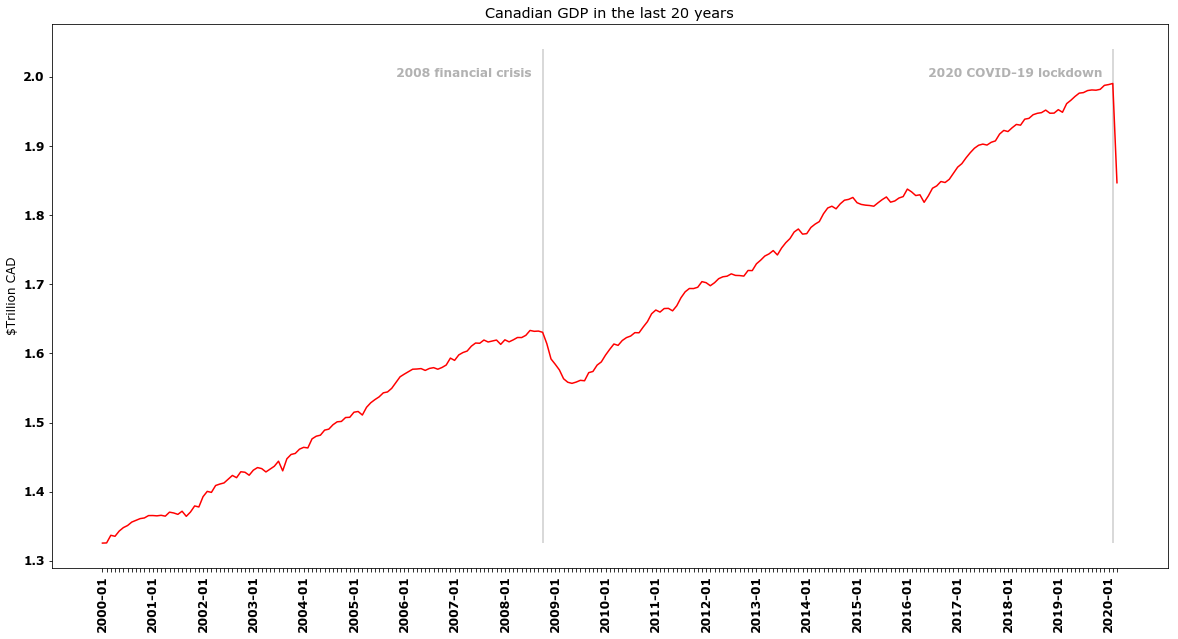

In [18]:
# overall GDP
# citation : Statistics Canada.  Table  14-10-0063-01   Employee wages by industry, monthly, unadjusted for seasonality


df = pd.read_csv('overallGDP_canada.csv')
df.columns = [x.lower() for x in df.columns]
industries = df['north american industry classification system (naics)'].unique()


plt.figure(figsize = (20,10))
plt.title('Canadian GDP in the last 20 years')
plt.ylabel('$Trillion CAD')

industry = industries[0]
columns = ['ref_date', 'value']

temp_df = df[df['north american industry classification system (naics)']==industry][columns]
first = temp_df.iloc[0][1]

temp_df['change'] = temp_df['value'] - first
temp_df['v_change'] = temp_df['change']/1_000

x= temp_df['ref_date']
y= temp_df['value']/1_000_000
plt.plot(x,y, color = 'red', alpha = 1, label=industry)
plt.xticks(x, rotation=90)

_, labels = plt.xticks()

for i in range(0,len(labels)):
    if i % 12 != 0:
        labels[i].set_visible(False)
        
        
plt.vlines(x=105, ymin=min(y), ymax=max(y)+0.05, alpha = 0.2)
s1 = '2008 financial crisis'
plt.text(x=70, y = 2.0, s=s1, alpha = 0.3)


plt.vlines(x=241, ymin=min(y), ymax=max(y)+0.05, alpha = 0.2)
s2 = '2020 COVID-19 lockdown'
plt.text(x=197, y = 2.0, s=s2, alpha = 0.3)


# plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()


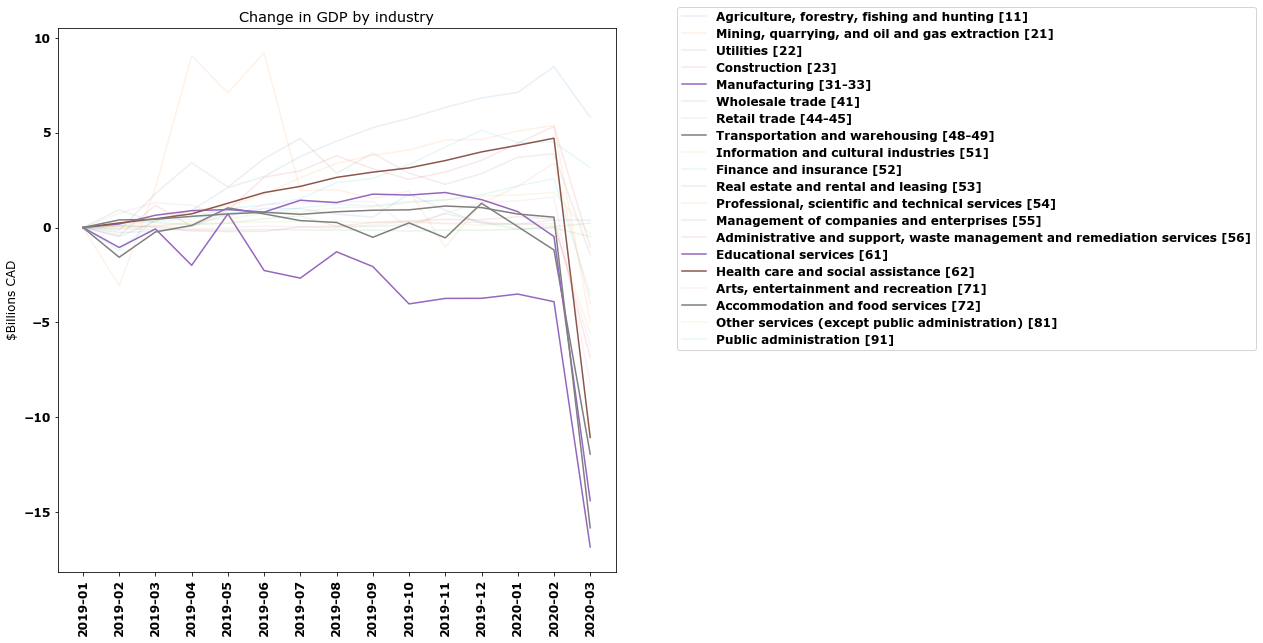

In [19]:
# GDP
# citation: Statistics Canada.  Table  36-10-0434-01   Gross domestic product (GDP) at basic prices, by industry, monthly (x 1,000,000)

df = pd.read_csv('gdp_canada.csv')
df.columns = [x.lower() for x in df.columns]
industries = df['north american industry classification system (naics)'].unique()

# industry = industries[0]
plt.figure(figsize = (10,10))
plt.title('Change in GDP by industry')
plt.ylabel('$Billions CAD')
plt.xticks(rotation = 90)
for industry in industries[16:]:
    columns = ['ref_date', 'value']
    temp_df = df[df['north american industry classification system (naics)']==industry][columns]
    first = temp_df.iloc[0][1]

    temp_df['change'] = temp_df['value'] - first
    temp_df['v_change'] = temp_df['change']/1_000
    
    x= temp_df['ref_date']
    y= temp_df['v_change']
    
    if temp_df.iloc[-1][-1] < -10:
        plt.plot(x,y, alpha = 1, label=industry)
    else:
        plt.plot(x,y, alpha = 0.1, label=industry)
    
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

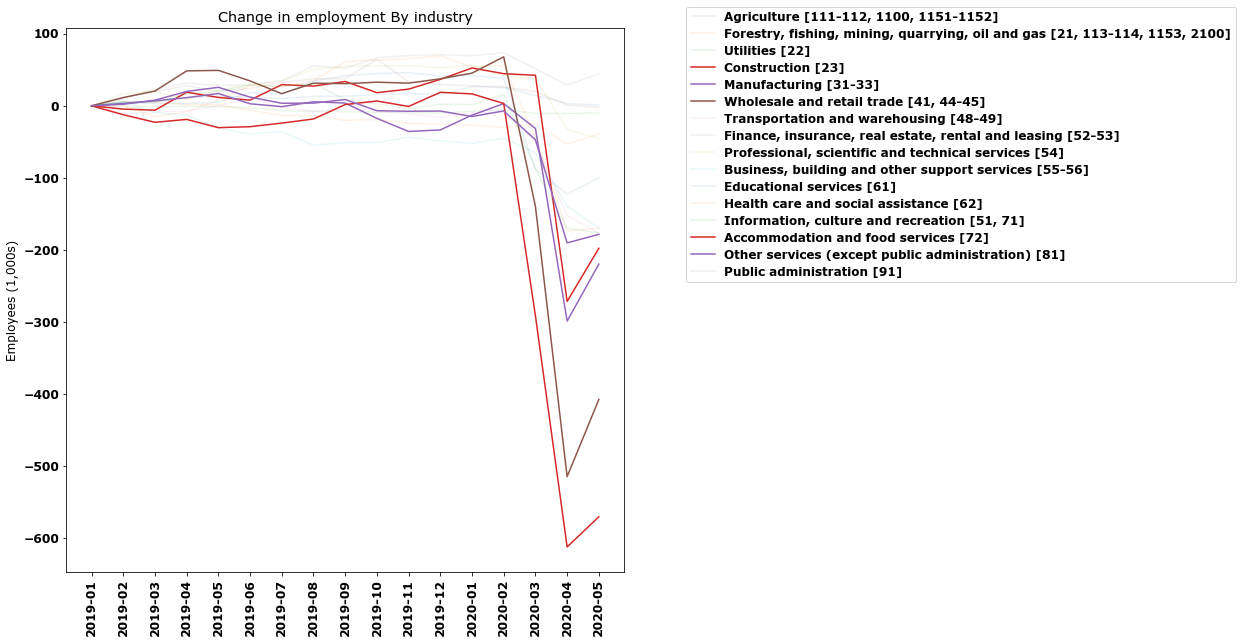

In [20]:
#Employment
# citation: Statistics Canada.  Table  14-10-0355-01   Employment by industry, monthly, seasonally adjusted and unadjusted, and trend-cycle (x 1,000)



df = pd.read_csv('employment_canada.csv')
df.columns = [x.lower() for x in df.columns]
industries = df['north american industry classification system (naics)'].unique()
industries = [i for i in industries if i[-1]==']']  #needs this step to remove aggrregate classes such as all industries

plt.figure(figsize = (10,10))
plt.title('Change in employment By industry')
plt.ylabel('Employees (1,000s)')
plt.xticks(rotation = 90)
for industry in industries:
    columns = ['ref_date', 'value']
    temp_df = df[df['north american industry classification system (naics)']==industry][columns]
    first = temp_df.iloc[0][1]
    temp_df['change'] = temp_df['value'] - first
#     temp_df['change'] = temp_df['value'].pct_change()
#     temp_df['v_change'] = temp_df['change']*temp_df['value']
    
    x= temp_df['ref_date']
    y= temp_df['change']
    
    if temp_df.iloc[-2][-1] < -190:
        plt.plot(x,y, alpha = 1, label=industry)
    else:
        plt.plot(x,y, alpha = 0.1, label=industry)
    
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

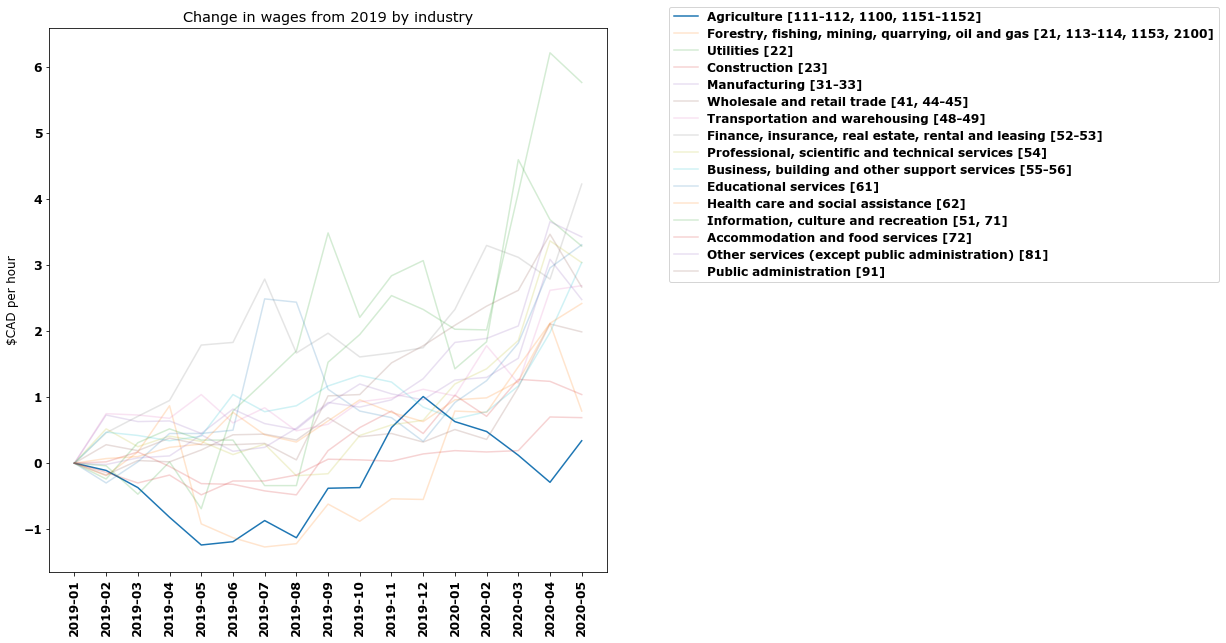

In [21]:
# Wages
# citation : Statistics Canada.  Table  14-10-0063-01   Employee wages by industry, monthly, unadjusted for seasonality


df = pd.read_csv('wages_canada.csv')
df.columns = [x.lower() for x in df.columns]
industries = df['north american industry classification system (naics)'].unique()
industries = [i for i in industries if i[-1]==']']  #needs this step to remove aggrregate classes such as all industries
# len(industries)

plt.figure(figsize = (10,10))
plt.title('Change in wages from 2019 by industry')
plt.ylabel('$CAD per hour')
plt.xticks(rotation = 90)
for industry in industries:
    columns = ['ref_date', 'value']
    temp_df = df[df['north american industry classification system (naics)']==industry][columns]
    first = temp_df.iloc[0][1]
    temp_df['change'] = temp_df['value'] - first
#     temp_df['v_change'] = temp_df['change']*temp_df['value']
    
    x= temp_df['ref_date']
    y= temp_df['change']
    
    if temp_df.iloc[-2][-1] < 0:
        plt.plot(x,y, alpha = 1, label=industry)
    else:
        plt.plot(x,y, alpha = 0.2, label=industry)
    
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

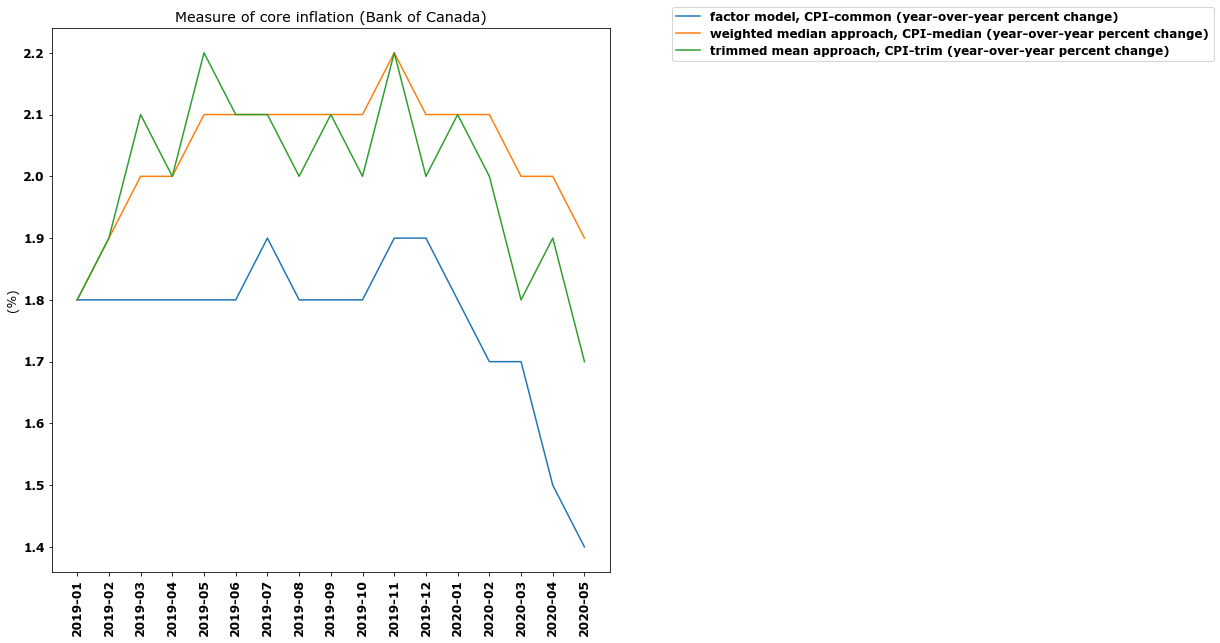

In [22]:
# Inflation
# citation : Statistics Canada.  Table  18-10-0256-01   Consumer Price Index (CPI) statistics, measures of core inflation and other related statistics - Bank of Canada definitions

df = pd.read_csv('cpi_canada.csv')
df.columns = [x.lower() for x in df.columns]
df = df.query('uom == "Percent"')
measurements = df['alternative measures'].unique()

plt.figure(figsize=(10,10))
plt.title('Measure of core inflation (Bank of Canada)')
plt.ylabel('(%)')
plt.xticks(rotation=90)
for m in measurements:
    temp_df = df[df['alternative measures']==m]
    x = temp_df['ref_date']
    y = temp_df['value']
    
    plt.plot(x,y, label = m[37:])
    
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

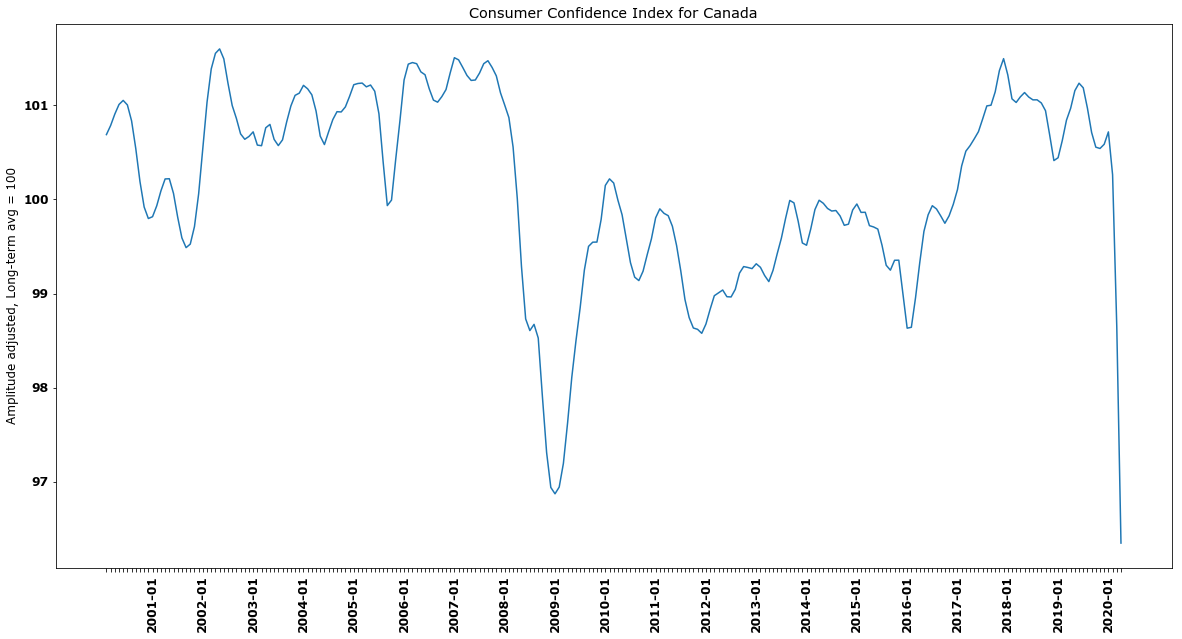

In [23]:
#consumer confidence index
# citation: 

df_cci = pd.read_csv('CCI_canada.csv')
df_cci.columns = [x.lower() for x in df_cci.columns]

plt.figure(figsize=(20,10))
plt.title('Consumer Confidence Index for Canada')
plt.ylabel('Amplitude adjusted, Long-term avg = 100')
plt.xticks(rotation=90)
x = df_cci['time']
y = df_cci['value']
    
plt.plot(x,y)

_, labels = plt.xticks()
for i in range(0,len(labels)):
    if (i+1) % 12 != 0:
        labels[i].set_visible(False)

# plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

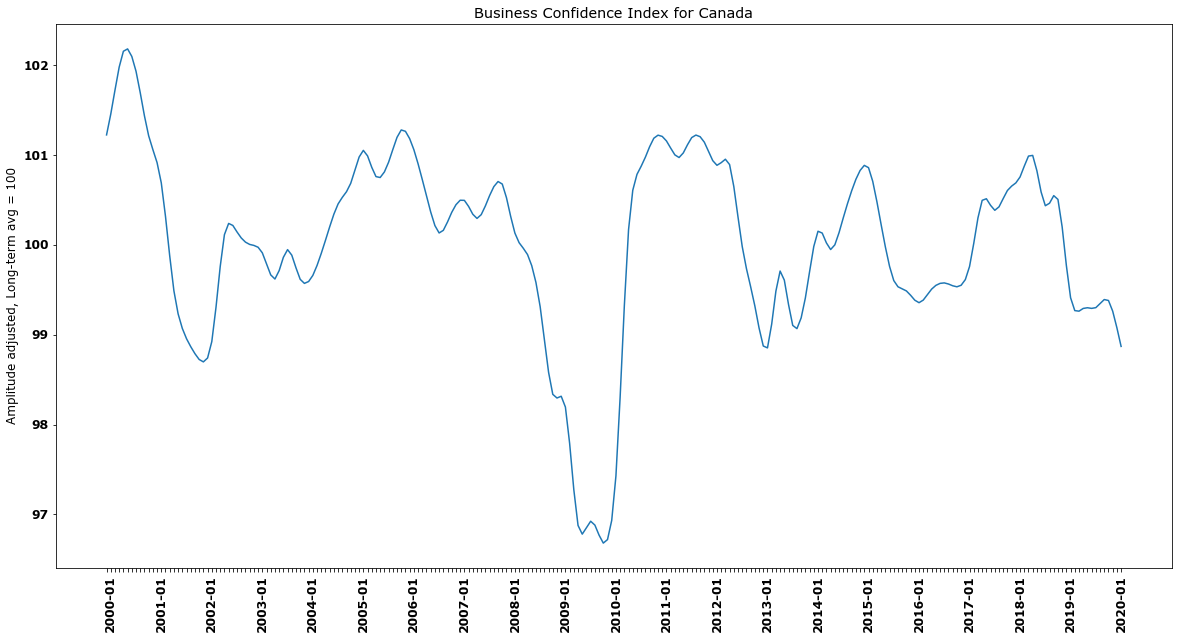

In [24]:
#consumer confidence index
# citation: 

df_bci = pd.read_csv('BCI_canada.csv')
df_bci.columns = [x.lower() for x in df_bci.columns]

plt.figure(figsize=(20,10))
plt.title('Business Confidence Index for Canada')
plt.ylabel('Amplitude adjusted, Long-term avg = 100')
plt.xticks(rotation=90)
x = df_bci['time']
y = df_bci['value']
    
plt.plot(x,y)

_, labels = plt.xticks()
for i in range(0,len(labels)):
    if (i-1) % 12 != 0:
        labels[i].set_visible(False)

# plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

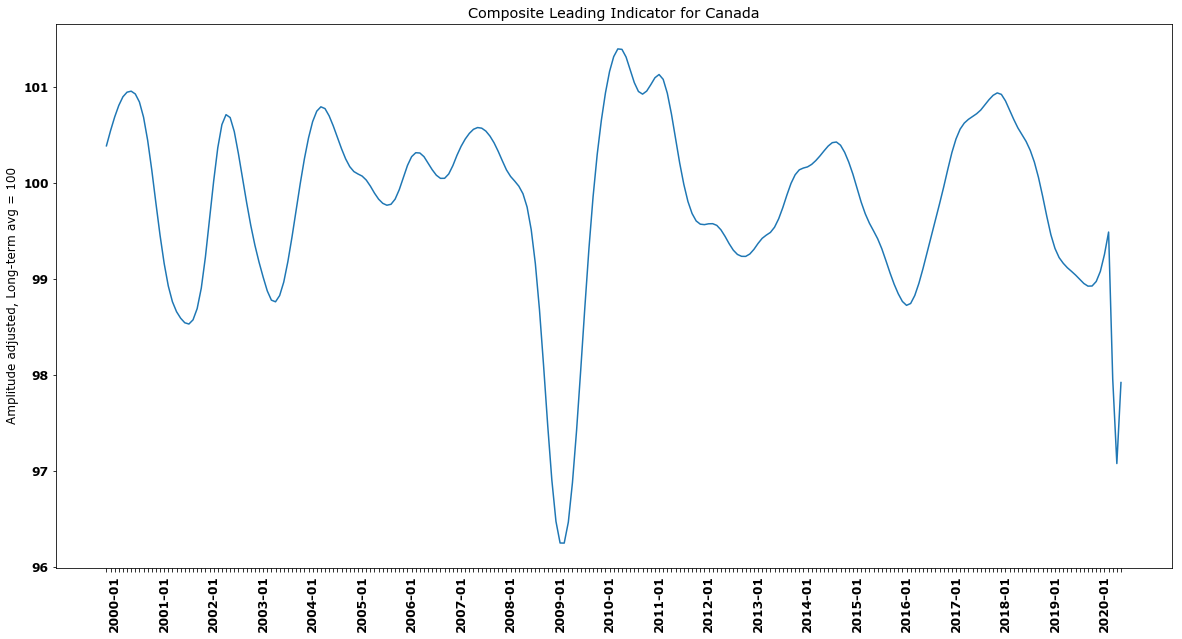

In [25]:
#consumer confidence index
# citation: 

df_cli = pd.read_csv('CLI_canada.csv')
df_cli.columns = [x.lower() for x in df_cli.columns]

plt.figure(figsize=(20,10))
plt.title('Composite Leading Indicator for Canada')
plt.ylabel('Amplitude adjusted, Long-term avg = 100')
plt.xticks(rotation=90)
x = df_cli['time']
y = df_cli['value']
    
plt.plot(x,y)

_, labels = plt.xticks()
for i in range(0,len(labels)):
    if (i-2) % 12 != 0:
        labels[i].set_visible(False)

# plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

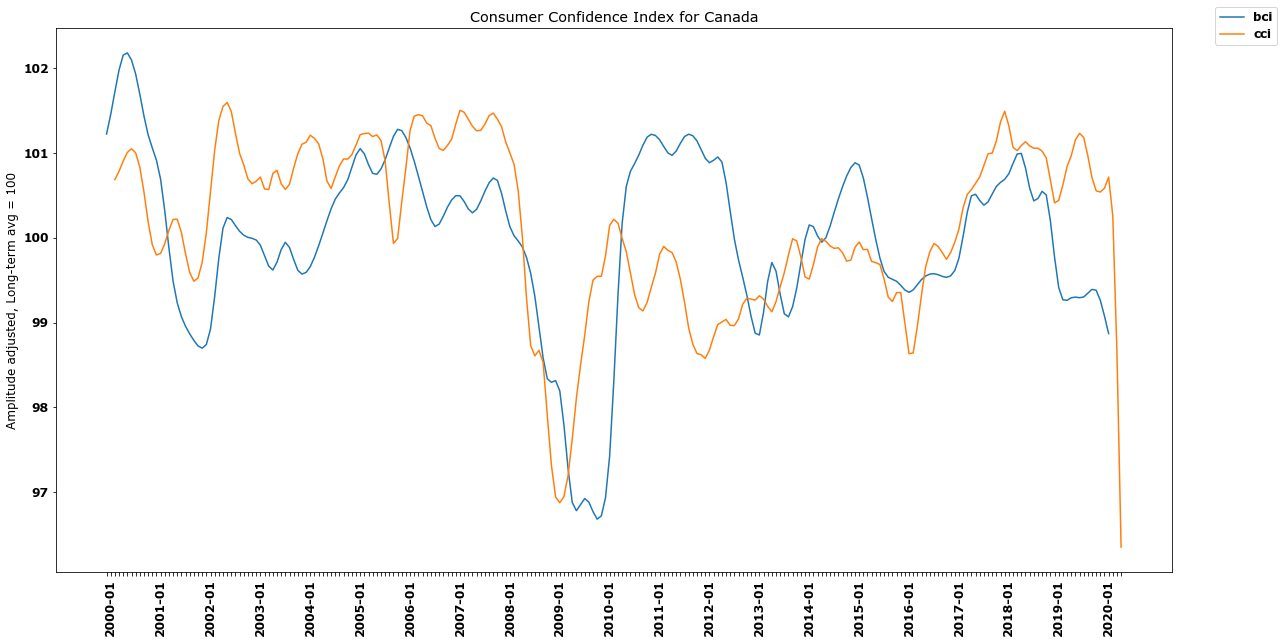

In [26]:
#consumer confidence index
# citation: 


plt.figure(figsize=(20,10))
plt.title('Consumer Confidence Index for Canada')
plt.ylabel('Amplitude adjusted, Long-term avg = 100')
plt.xticks(rotation=90)

#CCI
df_cci = pd.read_csv('CCI_canada.csv')
df_cci.columns = [x.lower() for x in df_cci.columns]
x = df_cci['time']
y = df_cci['value']
    
# BCI
df_bci = pd.read_csv('BCI_canada.csv')
df_bci.columns = [x.lower() for x in df_bci.columns]
x2 = df_bci['time']
y2 = df_bci['value']

# CLI
df_cli = pd.read_csv('CLI_canada.csv')
df_cli.columns = [x.lower() for x in df_cli.columns]

x3 = df_cli['time']
y3 = df_cli['value']



# plt.plot(x3,y3, label = 'cli')
plt.plot(x2,y2, label='bci')
plt.plot(x,y, label = 'cci')


_, labels = plt.xticks()
for i in range(0,len(labels)):
    if (i-1) % 12 != 0:
        labels[i].set_visible(False)

plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()